# Übung 09: Object Detection

## Aufgabe 1: Integral Images und Haar Filters

In der erste Übung wollen wir versuchen mittels Intergral Images und Haar Filters ein weisses Rechteck in einem Bild zu erkennen.

In [8]:
import numpy as np
import skimage
import skimage.data
import skimage.io
import skimage.future
import skimage.segmentation
import sklearn.cluster
import cv2


# for displaying images in jupyter
from matplotlib import pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]
#mpl.rcParams['figure.dpi']= 400

Das folgende Bild stammt aus der PREN Aufgabenstellung von 2019, wo ein Zug während der Fahrt eine Ziffer auf einem Signal detektieren soll. Um das zu vereinfachen soll zuerst das Signal gefunden werden.

In [9]:
image = cv2.imread('images/IMG_7446.jpg')

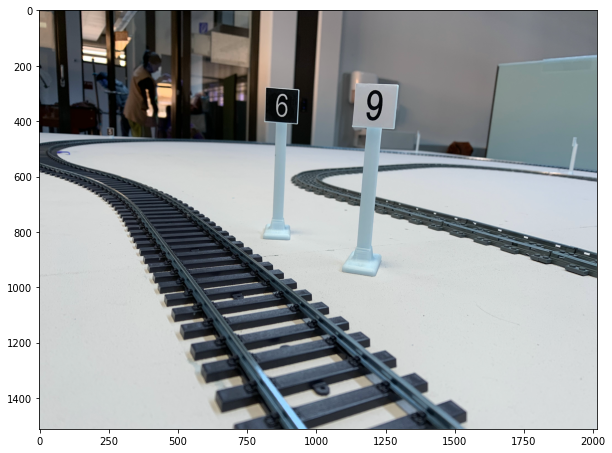

In [10]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.imshow(image)

Wir möchten nur einen Ausschnitt betrachten und konvertieren das Bild auf 1-Kanal als Grauwert.

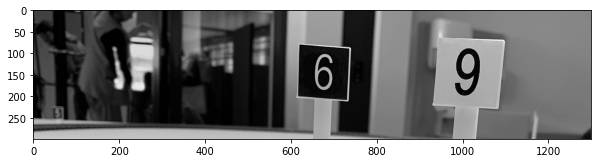

In [11]:
sub = image[200:500, 200:1500]
sub_gray = cv2.cvtColor(sub, cv2.COLOR_RGB2GRAY)
plt.imshow(sub_gray, cmap='gray')

Berechnen sie nun das Intergral Bild mittels cv2.integral und stellen sie dieses dar.

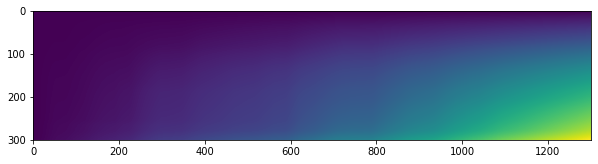

In [12]:
integral_img = cv2.integral(sub_gray)
plt.imshow(integral_img)

Im nächsten Feld ist die Definition eines Haar Features das die Summe der Pixel in einem Rechteck aus dem Integral Bild berechnet. Vervollständigen Sie die Funktion.

In [13]:
def haar_feature(integral_image: np.ndarray, height:int, width:int, row:int, col:int):
    # see https://en.wikipedia.org/wiki/Haar-like_feature
    # Add code to calculate features
    
    
    # sum = D - B - C + A 
    
    #+-----------------------------------------+
    #|                                         |
    #|    A             B                      |
    #|    +-------------+                      |
    #|    |             |                      |
    #|    |             |                      |
    #|    +-------------+                      |
    #|    C             D                      |
    #|                                         |
    #|                                         |
    #+-----------------------------------------+
    
    D = integral_image[row + height][col + width]
    B = integral_image[row][col + width]
    C = integral_image[row + height][col]
    A = integral_image[row][col]
    
    return D - B - C + A

Die folgende Funktion benützt das haar_feature um ein Rechteck zu finden. Benutzen Sie die Funktion nun um das beste, weisse Rechteck zu finden und stellen sie dieses dar.

In [14]:
def find_rect(integral_image: np.ndarray, height: int, width: int):
    max_value = 0
    max_position = (0,0)
    for row in range(integral_image.shape[0] - height - 1):
        for col in range(integral_image.shape[1] - width - 1):
            value = haar_feature(integral_image, height, width, row, col)
            if value > max_value:
                max_value = value
                max_position = (row, col)
    return max_position


In [16]:
x, y = find_rect(integral_img, 150, 150)
print(x, y)

67 940


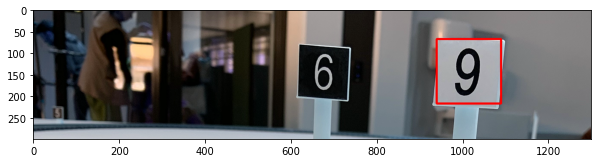

In [17]:
copy = sub.copy()
copy[x][y] = (255, 0, 0)
cv2.rectangle(copy, (y, x),(y + 150, x + 150), (255,0,0), 3)
plt.imshow(copy)